# Stock Prediction

In [1]:
# Import Modules
import math
import pandas as pd
import pandas_datareader as web
from datetime import date
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the Stock Quote
today = date.today()
stock = str(input())
df = web.DataReader(stock,data_source='yahoo',start='2012-01-01',end=today)
#show The data


RELIANCE.NS


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,351.542725,340.348846,345.128540,349.957764,8679938.0,324.075989
2012-01-03,360.037201,351.839905,352.780975,358.922760,9455771.0,332.377899
2012-01-04,362.043182,353.325836,360.284851,354.712677,8557084.0,328.479248
2012-01-05,359.071350,343.791199,354.143066,346.465851,13364666.0,320.842285
2012-01-06,358.600830,345.054230,345.252350,355.406097,9495456.0,329.121338
...,...,...,...,...,...,...
2021-03-08,2231.899902,2168.000000,2168.500000,2191.100098,9002404.0,2191.100098
2021-03-09,2213.800049,2146.600098,2200.000000,2191.050049,6993792.0,2191.050049
2021-03-10,2215.100098,2170.250000,2207.000000,2181.949951,5316182.0,2181.949951


In [45]:
# if df['Open'] > df['Close']:
#     print("Go high")
# else:
#     print("Go Low")

# close =  df['Close'].tail(1)
# openpr = df['Open'].tail(1)
# if openpr[0] > close[0]: 
#     print("up")
# else:
#     print("down")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,351.542725,340.348846,345.128540,349.957764,8679938.0,324.075989
2012-01-03,360.037201,351.839905,352.780975,358.922760,9455771.0,332.377899
2012-01-04,362.043182,353.325836,360.284851,354.712677,8557084.0,328.479248
2012-01-05,359.071350,343.791199,354.143066,346.465851,13364666.0,320.842285
2012-01-06,358.600830,345.054230,345.252350,355.406097,9495456.0,329.121338
...,...,...,...,...,...,...
2021-03-08,2231.899902,2168.000000,2168.500000,2191.100098,9002404.0,2191.100098
2021-03-09,2213.800049,2146.600098,2200.000000,2191.050049,6993792.0,2191.050049
2021-03-10,2215.100098,2170.250000,2207.000000,2181.949951,5316182.0,2181.949951


In [3]:
#Get The number of the rows and columns in  data set 
df.shape

(2265, 6)

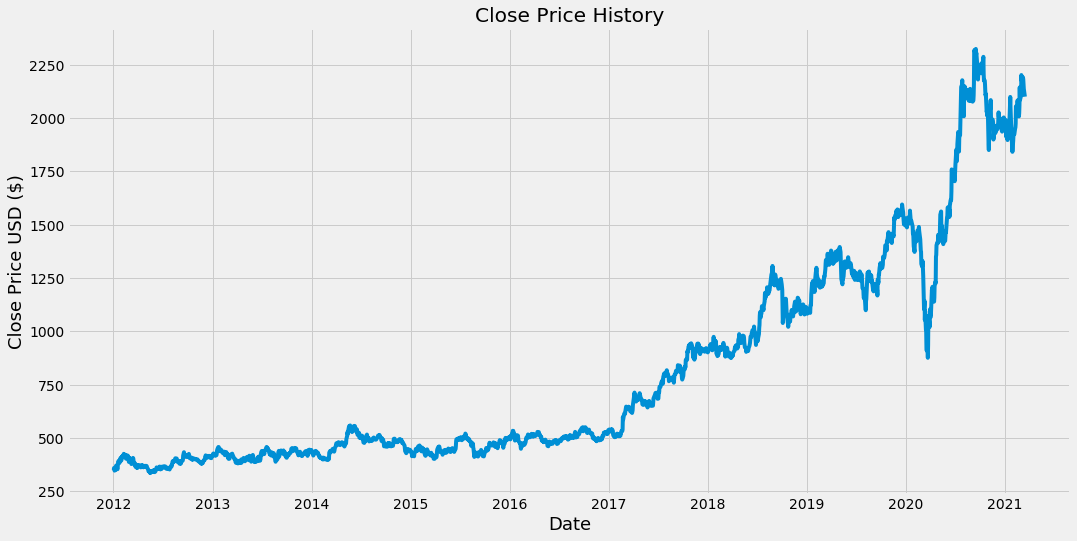

In [23]:
#visualize the data 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [5]:
#Create the new dataframe
data = df.filter(['Close'])
#Convert the data frame into numpy
dataset = data.values
#Get the number of the rows to train the model
training_data_len = math.ceil( len(dataset)* .9)
training_data_len

2039

In [6]:
#Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00758017],
       [0.01208593],
       [0.00996996],
       ...,
       [0.92832993],
       [0.90603992],
       [0.88744392]])

In [7]:
#Create the training data set
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        

[array([0.00758017, 0.01208593, 0.00996996, 0.00582515, 0.01031847,
       0.00750547, 0.01496117, 0.01796086, 0.01513542, 0.01386584,
       0.00917337, 0.01641745, 0.0258024 , 0.02727114, 0.0290137 ,
       0.02376112, 0.02679814, 0.02859051, 0.03592172, 0.02953646,
       0.03510022, 0.03861024, 0.03812481, 0.0403777 , 0.03905834,
       0.04193357, 0.04538134, 0.04424868, 0.04160995, 0.04310358,
       0.04301644, 0.03996696, 0.03394267, 0.03537405, 0.04168463,
       0.03915792, 0.04070133, 0.0358097 , 0.02622559, 0.02997211,
       0.03600884, 0.03356926, 0.03435342, 0.03022104, 0.02500579,
       0.02133397, 0.02432121, 0.03048243, 0.0358097 , 0.03445299,
       0.03000944, 0.02396027, 0.01966609, 0.0210228 , 0.02288983,
       0.0149985 , 0.01691532, 0.01344265, 0.01367913, 0.01234732])]
[0.012085926595297947]

[array([0.00758017, 0.01208593, 0.00996996, 0.00582515, 0.01031847,
       0.00750547, 0.01496117, 0.01796086, 0.01513542, 0.01386584,
       0.00917337, 0.01641745, 0.0

In [8]:
#Convert the x_train to y_train into numpy array
x_train, y_train = np.array(x_train),np.array(y_train)
#Reshape the data 
x_train.shape

(1979, 60)

In [9]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1979, 60, 1)

In [10]:
#build the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
#Trian The Model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1979/1979 [==============================] - 47s 24ms/step - loss: 7.3593e-04


In [13]:
#creates the testing data set 
#Create a new array containing the scaled vslue.
test_data = scaled_data[training_data_len - 60: , :]
x_test =[]
y_test = dataset[training_data_len:, :] #predict values
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#Convert the data into numpy array
x_test = np.array(x_test)

In [15]:
#reshape the data 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [16]:
#Get the module Prdicted Price Values
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [17]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean( prediction -y_test)**2 )
rmse

30.752361466399336

C:\Users\tppat\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


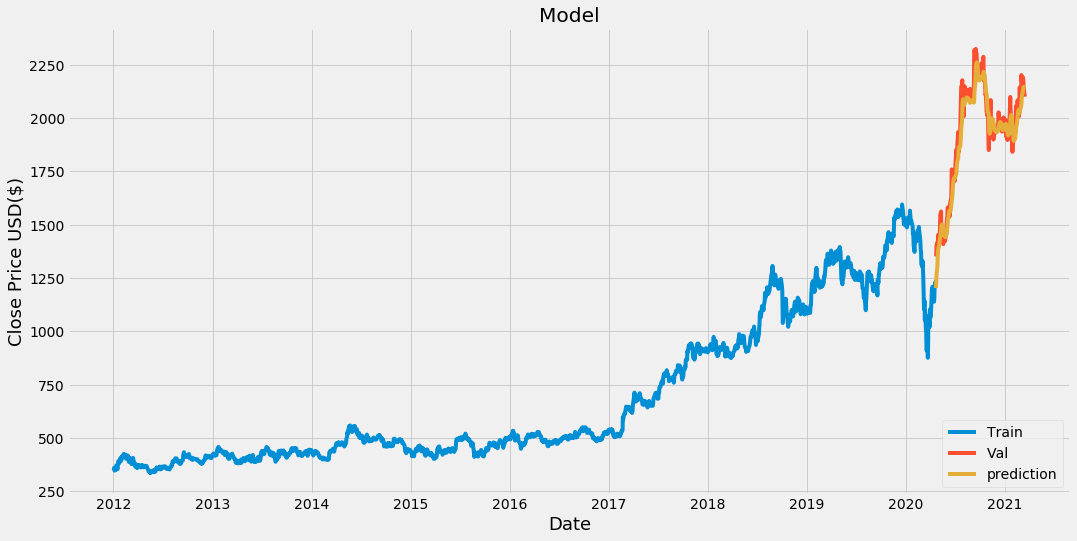

In [18]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Val','prediction'],loc='lower right')
plt.show()

In [19]:
#Show the Valid and Predictions 
valid

,Close,prediction
Date,,
2020-04-22,1350.795776,1202.907837
2020-04-23,1358.027222,1231.503662
2020-04-24,1403.694336,1264.260620
2020-04-27,1416.324707,1300.990967
2020-04-28,1414.739624,1335.681274
...,...,...
2021-03-08,2191.100098,2119.472168
2021-03-09,2191.050049,2132.399170
2021-03-10,2181.949951,2141.958740


In [20]:
#Get The quote
apple_quote = web.DataReader('RELIANCE.NS',data_source='yahoo',start='2012-01-01',end='2020-10-16')
#Create a New DataFrame
new_df = apple_quote.filter(['Close'])
#Convert dataframe to array
last_60_days = new_df[-60:].values
#scale the data to be values bet 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create empty list
X_test = []
#Append
X_test.append(last_60_days_scaled)
#Convert The x_test data set to numpy array
X_test = np.array(X_test)
#Reshape
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Predict
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2199.4995]]


In [21]:
reliance_stock = web.DataReader('RELIANCE.NS',data_source='yahoo',start='2012-01-01',end='2020-10-16')
reliance_stock['Close']

Date
2012-01-02     349.957764
2012-01-03     358.922760
2012-01-04     354.712677
2012-01-05     346.465851
2012-01-06     355.406097
                 ...     
2020-10-12    2237.050049
2020-10-13    2280.699951
2020-10-14    2287.500000
2020-10-15    2206.500000
2020-10-16    2175.800049
Name: Close, Length: 2164, dtype: float64